<center>

# Курсовая работа на тему 
# «Метод наименьших квадратов»
### Описание модели
</center>



Модель полезного сигнала имеет вид (1):

$$\phi(x) = \theta_0 + \theta_1 x + \ldots + \theta_m x^m. $$

Рассматривается модель наблюдений (2):
$$ y_k = \theta_0 + \theta_1 x_k + \ldots + \theta_m x_k^m + \varepsilon_k, \quad k=\overline{1, n}, $$
где $\varepsilon_1, \ldots, \varepsilon_n $  – независимые центрированные и одинаково распределённые случайные величины.
<center>

### Моделирование данных
Смоделировать два набора наблюдений на основе модели (2) для следующих случаев:

$$ m=3, \qquad \varepsilon_k \sim N(0, \sigma^2) $$

$$ m=2, \qquad \varepsilon_k \sim R(-3\sigma, 3\sigma) $$

$$x_k=-4+k\frac{8}{n}, \qquad k = \overline{1,n} , \qquad n=40$$ 

### Вариант № 1

$$\theta_0 = (-1)^{N+1}\frac{N}{2} = (-1)^{1+1}\frac{1}{2} = 0.5$$

$$\theta_1 = -1$$

$$\theta_2 = -6$$

$$\theta_3 = 0.02$$

$$\sigma^2 = 1.5$$
<center>



### <center>  Задание  <center>
Для обоих случаев выполнить по очереди следующие задания.
1. Подобрать порядок многочлена $\hat{m} \ge 1$ в модели (1), используя критерий Фишера на уровне значимости 0.05, и вычислить оценки неизвестных параметров $(\theta_0, \ldots, \theta_{\hat{m}})$ методом наименьших квадратов.
2. В предположении нормальности ошибок построить доверительные интервалы уровней
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для параметров $(\theta_0, \ldots, \theta_{\hat{m}})$.
3. В предположении нормальности ошибок построить доверительные интервалы уровней.
надёжности $\alpha_1 = 0.95$ и $\alpha_2 = 0.99$ для полезного сигнала (1).
4. Представить графически
\
$\bullet$ истинный полезный сигнал,
\
$\bullet$ набор наблюдений,
\
$\bullet$ оценку полезного сигнала, полученную в шаге 1,
\
$\bullet$ доверительные интервалы полезного сигнала, полученные в шаге 3.
5. По остаткам регрессии построить оценку плотности распределения случайной ошибки
наблюдения в виде гистограммы.
6. В предположении нормальности ошибок вычислить оценку максимального правдоподобия
дисперсии $\sigma^2$ случайной ошибки.
7. По остаткам регрессии с помощью &chi;² критерия Пирсона на уровне значимости 0.05 проверить
гипотезу о том, что закон распределения ошибки наблюдения является нормальным.

### <center>  Решение  <center>

#### Импортирование библиотек

In [1]:
import numpy as np
import statsmodels.api as sm

#### Импортирование реализованных функций и классов

In [2]:
from distribution import Distribution
from statistic import t_test, calculate_confidence_interval_w, calculate_confidence_interval_phi, calculate_chi2
from graphics import plot_phi, plot_phi_estimation, plot_phi_intervals, plot_hist

#### Конфигурация графиков

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

### <center> Генерация данных <center>

In [4]:
theta = np.array([0.5, -1, -6, 2e-2])
var = 1.5
n = 40
m = 3
normal_distribution = True

norm = Distribution(theta, var, n, m, normal_distribution)

In [5]:
print("Шум")
print(norm.eps)

Шум
[ 1.61335509  1.39299286 -0.10965345  0.26313419  0.44207092 -0.06107799
 -1.82430388  0.43466962 -2.29723438  0.39788891  1.67849322  1.56549543
  1.78443715 -0.60809411 -2.07380713  0.42392188  0.63615175  0.20183579
  1.20138489  0.16592641 -1.05658336  0.42434472  0.39421946 -1.62103295
  1.26027278 -0.1226741  -2.19125543 -1.52847021  1.23695732  2.30483235
 -0.338954    0.09617948  2.51147236 -1.87372077 -0.89807882  0.16209001
  0.89693158 -1.82024257  1.39011264 -1.90049561]


In [6]:
print("Признак x")
print(norm.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [7]:
print("Зависимая переменная y")
print(norm.y)

Зависимая переменная y
[-87.23744 -78.19312 -69.64608 -61.59536 -54.04    -46.97904 -40.41152
 -34.33648 -28.75296 -23.66    -19.05664 -14.94192 -11.31488  -8.17456
  -5.52     -3.35024  -1.66432  -0.46128   0.25984   0.5       0.26016
  -0.45872  -1.65568  -3.32976  -5.48     -8.10544 -11.20512 -14.77808
 -18.82336 -23.34    -28.32704 -33.78352 -39.70848 -46.10096 -52.96
 -60.28464 -68.07392 -76.32688 -85.04256 -94.22   ]


### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05. 
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $. 
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$ 
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [8]:
m = 2
while t_test(norm.x_k, norm.y, m, 0.05):
    m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 является статистически значимым.
Степень многочлена = 4 не является статистически значимым.
Степень многочлена равна 3


In [9]:
for i in range(len(norm.w)):
    print(f'theta_{i} = {norm.w[i]}')

theta_0 = 0.5296103901233032
theta_1 = -0.8794259174572829
theta_2 = -5.9895085465203435
theta_3 = -0.0011592871575573094


Сравним с готовой реализацией в пакете STATSMODELS

In [10]:
X = np.vander(norm.x_k, 4, increasing=True)
distr_packet = sm.OLS(norm.phi + norm.eps, sm.add_constant(X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6101.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           9.15e-49
Time:                        23:00:14   Log-Likelihood:                -66.732
No. Observations:                  40   AIC:                             141.5
Df Residuals:                      36   BIC:                             148.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5296      0.321      1.647      0.1

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$ 
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- Распределение Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка.

In [11]:
for a in [0.95, 0.99]:
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(norm.w):
        l, r = calculate_confidence_interval_w(norm.se[i], w, norm.n, norm.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=0.5296103901233032:
		Доверительный интервал (-0.7425583822239211, 1.8017791624705275)
	Theta_1=-0.8794259174572829:
		Доверительный интервал (-1.7961943506385154, 0.03734251572394964)
	Theta_2=-5.9895085465203435:
		Доверительный интервал (-6.169150512573681, -5.8098665804670055)
	Theta_3=-0.0011592871575573094:
		Доверительный интервал (-0.08901303561699239, 0.08669446130187777)

Уровень доверия 0.99:
	Theta_0=0.5296103901233032:
		Доверительный интервал (-1.1762491124757766, 2.2354698927223833)
	Theta_1=-0.8794259174572829:
		Доверительный интервал (-2.1087267597815527, 0.3498749248669868)
	Theta_2=-5.9895085465203435:
		Доверительный интервал (-6.23039164435984, -5.748625448680847)
	Theta_3=-0.0011592871575573094:
		Доверительный интервал (-0.11896295826321175, 0.11664438394809713)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$- Распределение Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка.

In [12]:
limits = {}

In [13]:
for alpha in [0.95, 0.99]:
    print(f"Уровень доверия {alpha}:")
    l, r = calculate_confidence_interval_phi(norm.mse, norm.X, norm.w, norm.n, norm.m, alpha)
    limits[alpha] = [l[0], r[0]]
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-0.00115928715755731*x**3 - 5.98950854652034*x**2 - 0.879425917457283*x - 5.35275084213888*sqrt(x**3*(0.00026938073628822*x**3 - 8.08142208864661e-5*x**2 - 0.00257420231597023*x + 0.0002579589930696) + 0.0002579589930696*x**3 + x**2*(-8.08142208864661e-5*x**3 + 0.00112631934138338*x**2 + 0.000551845679767582*x - 0.00594042709754565) - 0.00594042709754565*x**2 + x*(-0.00257420231597023*x**3 + 0.000551845679767582*x**2 + 0.0293335918541161*x - 0.00176149140981812) - 0.00176149140981812*x + 0.0564852954529642) + 0.529610390123303
	-0.00115928715755731*x**3 - 5.98950854652034*x**2 - 0.879425917457283*x + 5.35275084213888*sqrt(x**3*(0.00026938073628822*x**3 - 8.08142208864661e-5*x**2 - 0.00257420231597023*x + 0.0002579589930696) + 0.0002579589930696*x**3 + x**2*(-8.08142208864661e-5*x**3 + 0.00112631934138338*x**2 + 0.000551845679767582*x - 0.00594042709754565) - 0.00594042709754565*x**2 + x*(-0.00257420231597023*x**3 + 0.000551845679767582

### <center> № 4 <center>

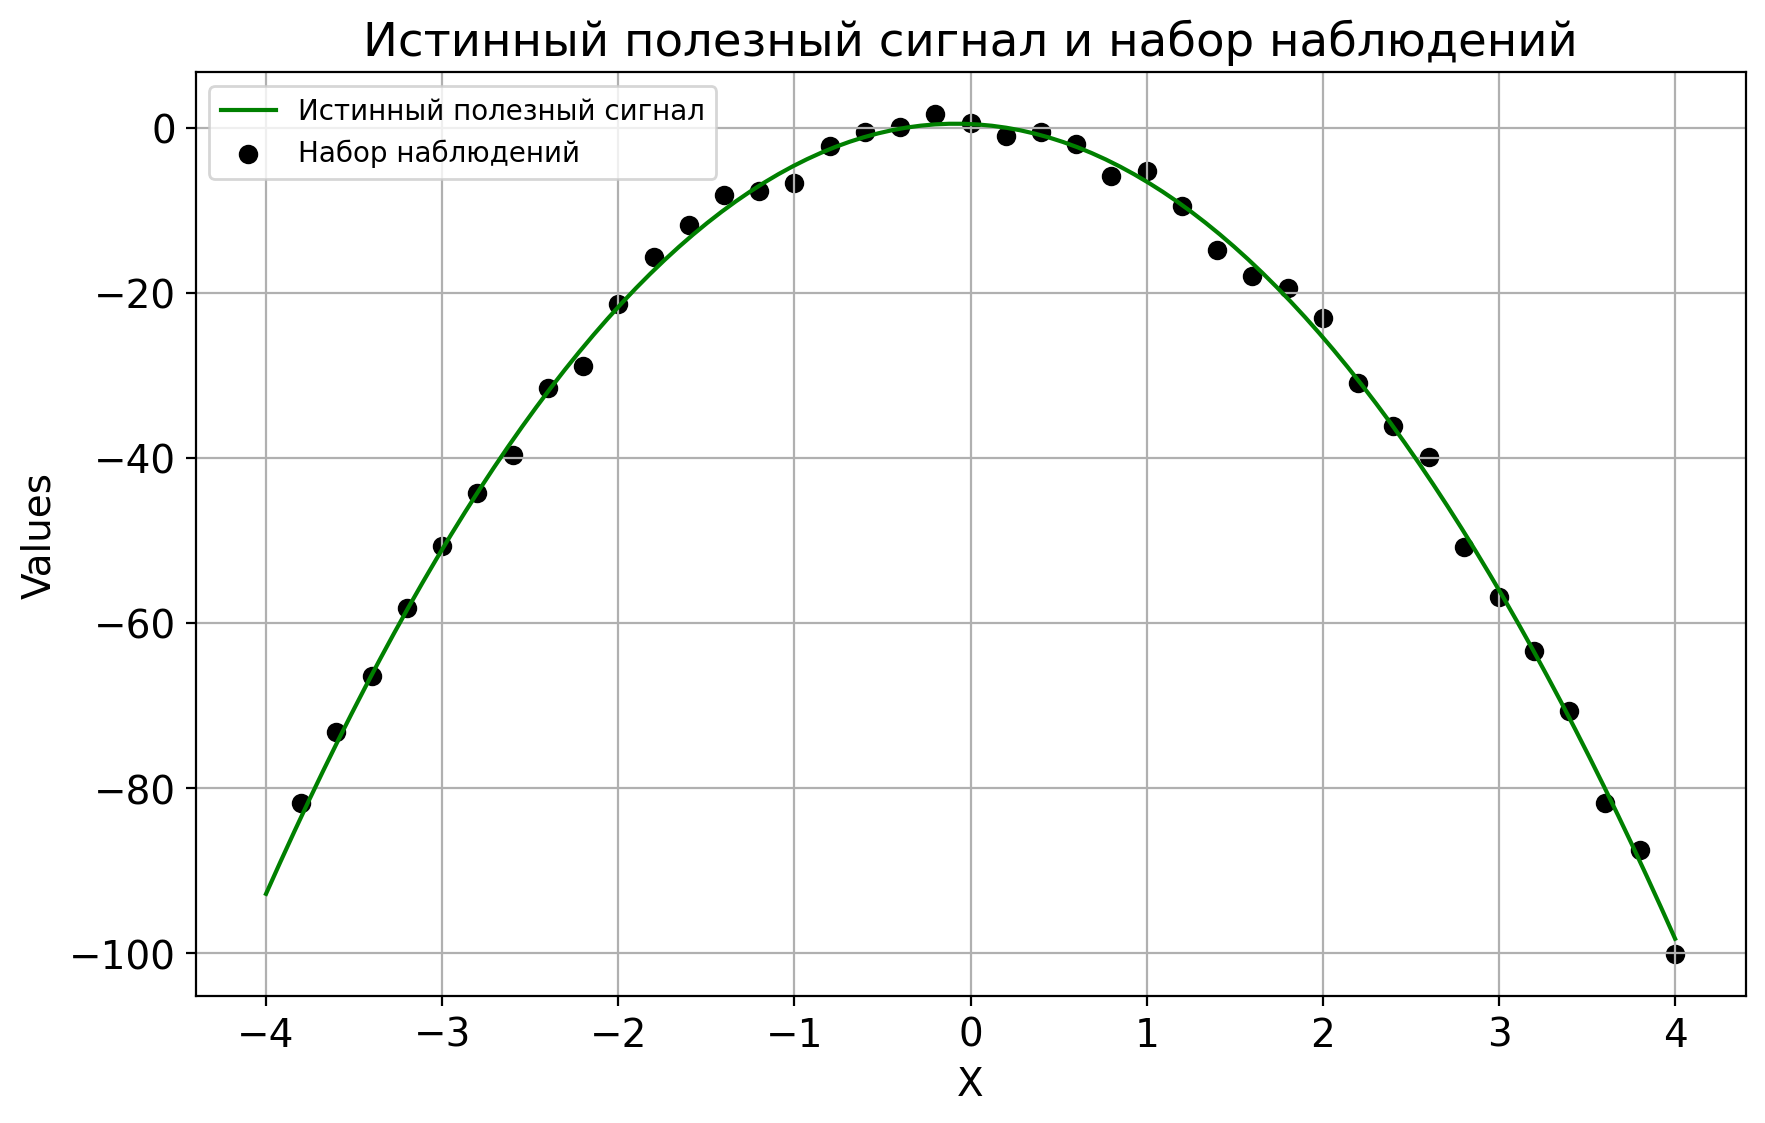

In [14]:
plot_phi(norm.x_k, norm.theta, norm.eps, norm.m)

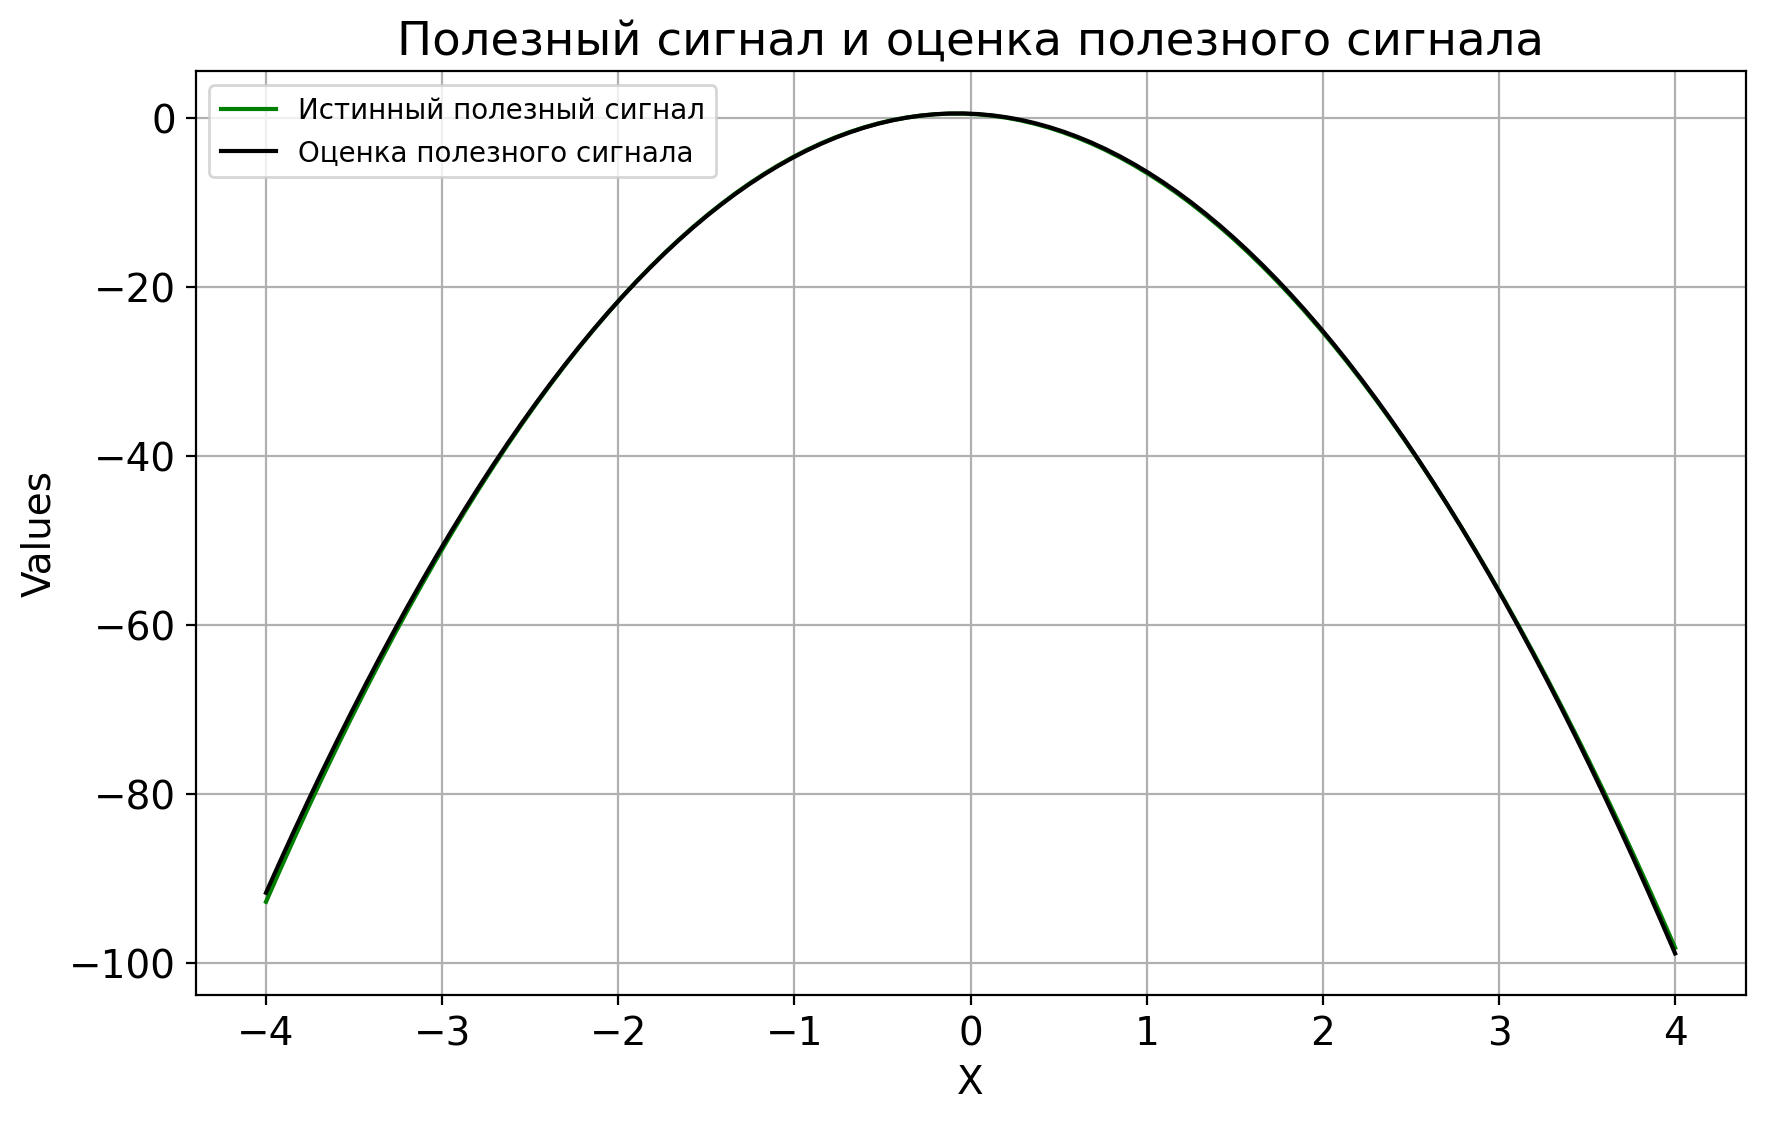

In [15]:
plot_phi_estimation(norm.theta, norm.w, norm.m)

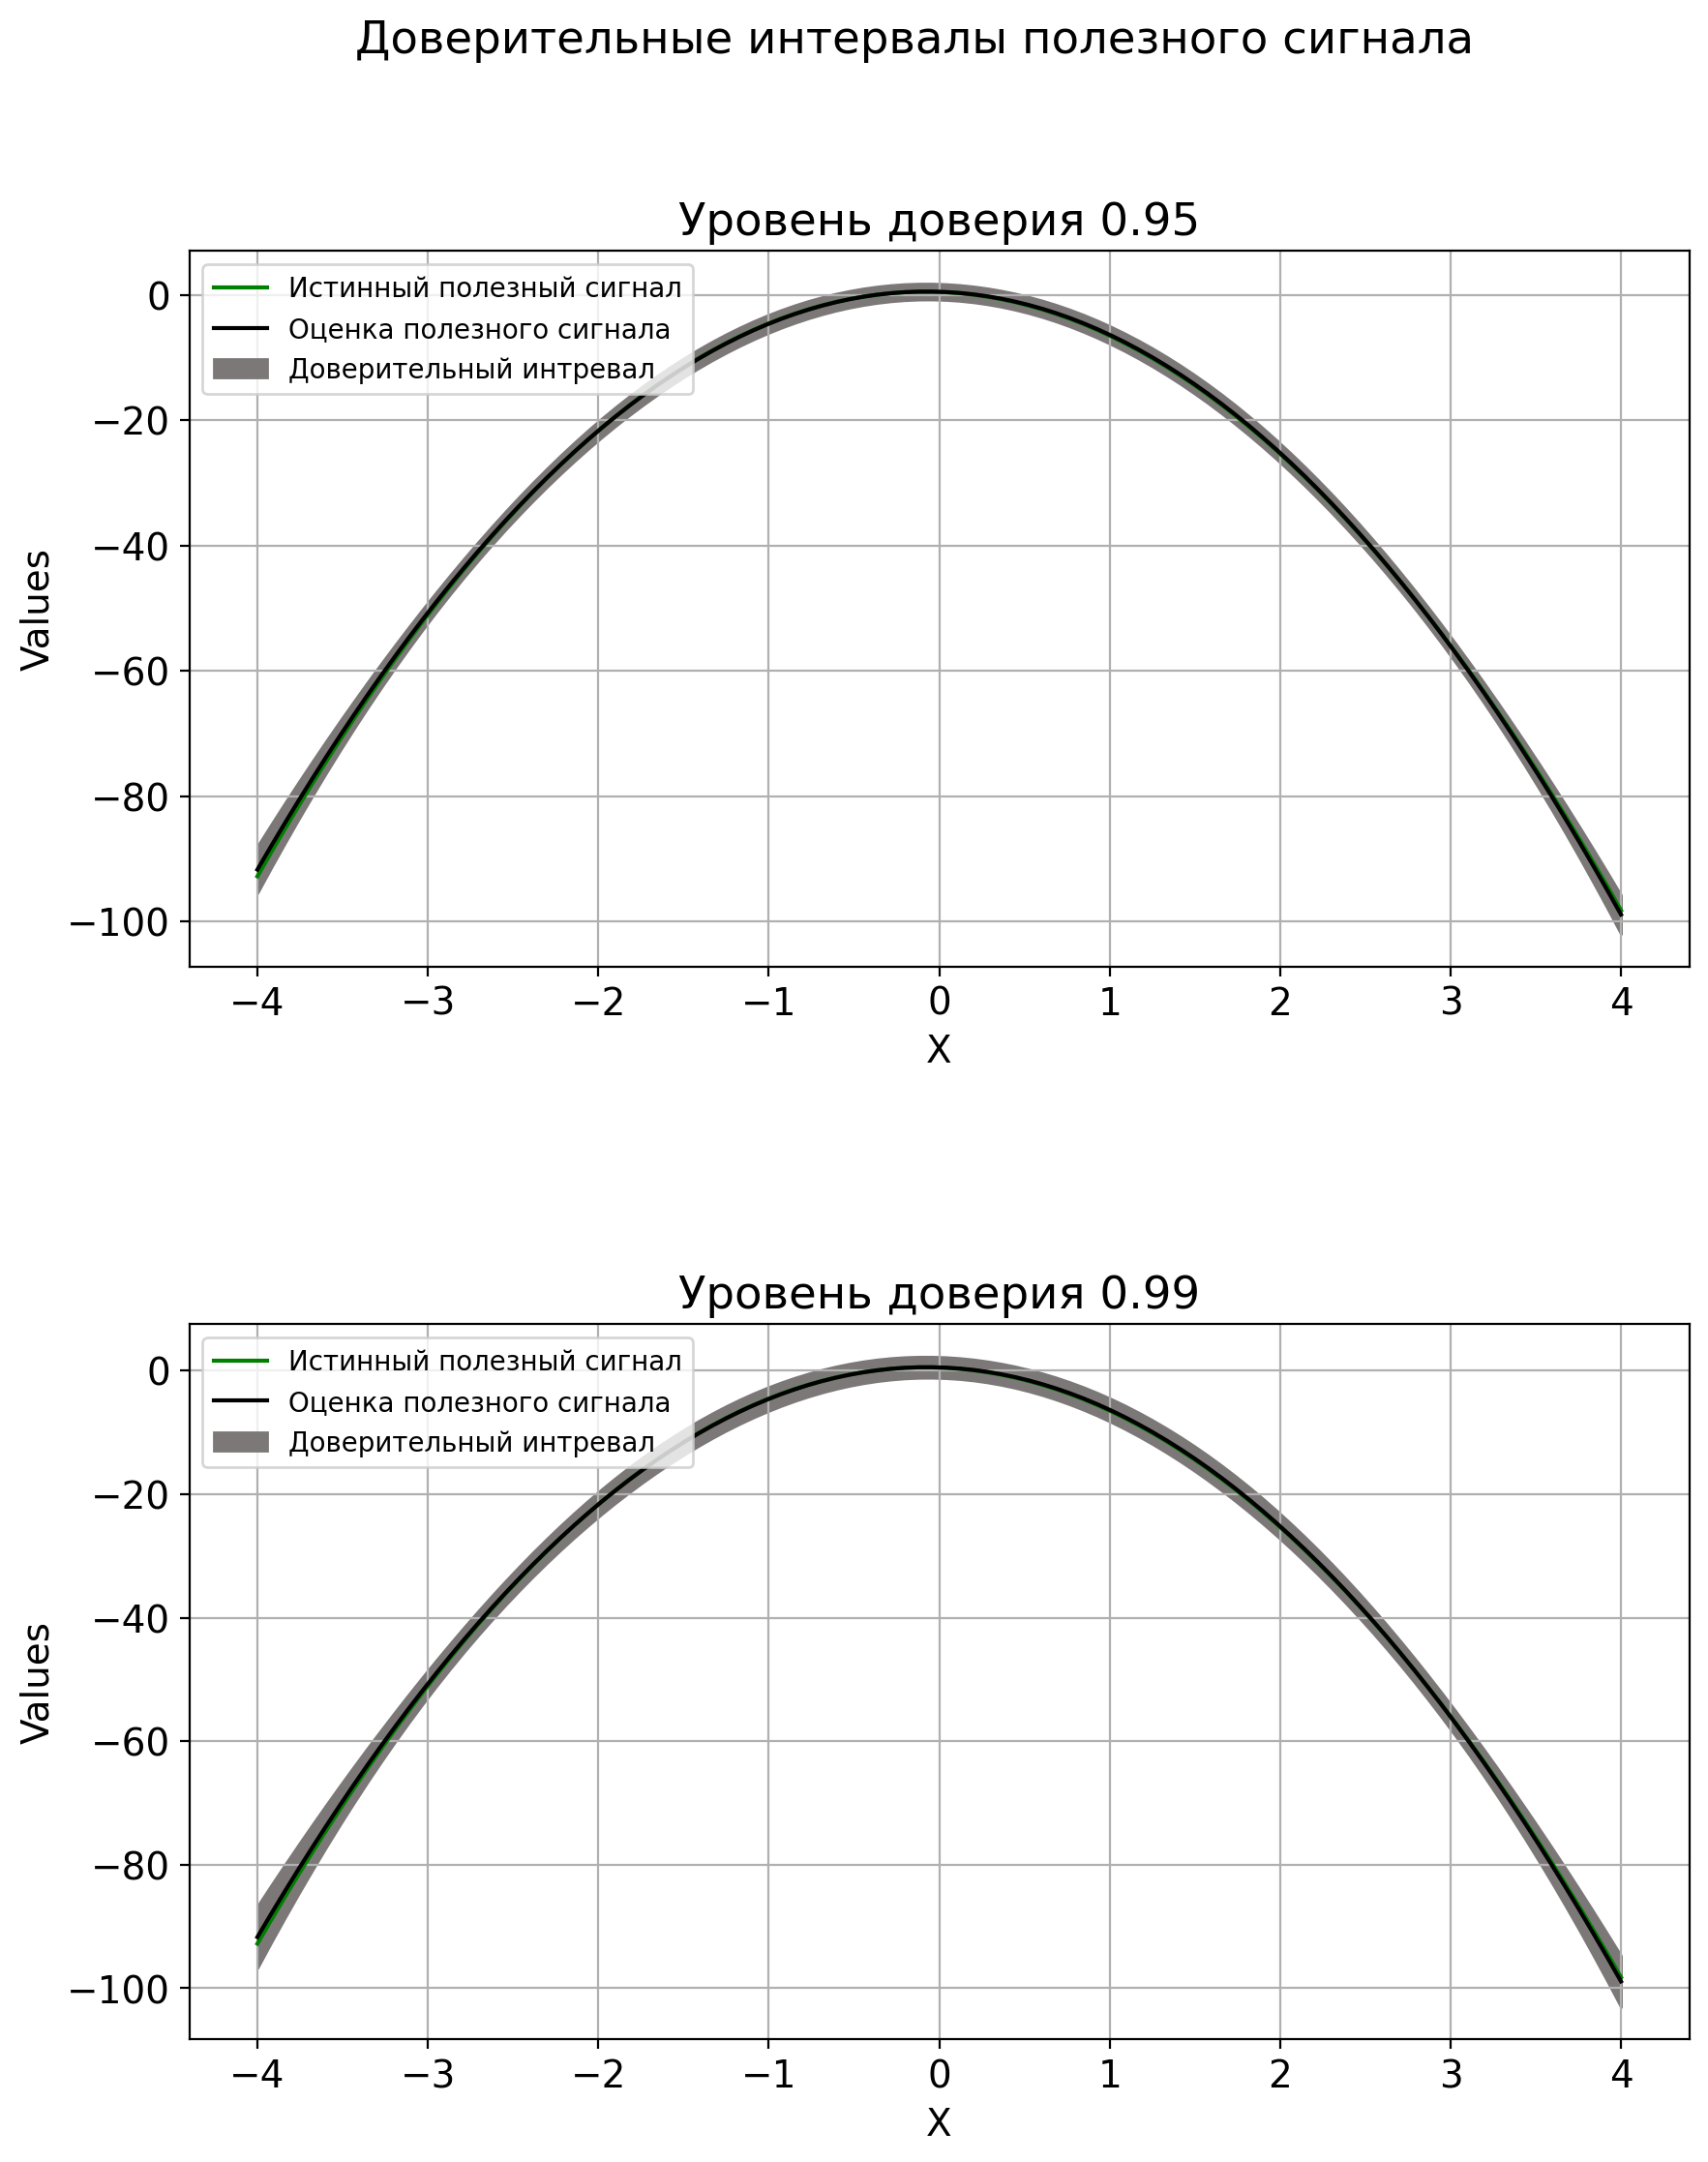

In [16]:
plot_phi_intervals(norm.theta, norm.w, norm.m, limits)

### <center> № 5 <center>
Для определения числа столбцов воспользуемся формулой:
$$N_{cols} = 1 + floor(3.322lg(N))$$
$$N = 40 \Rightarrow N_{cols} = 6$$

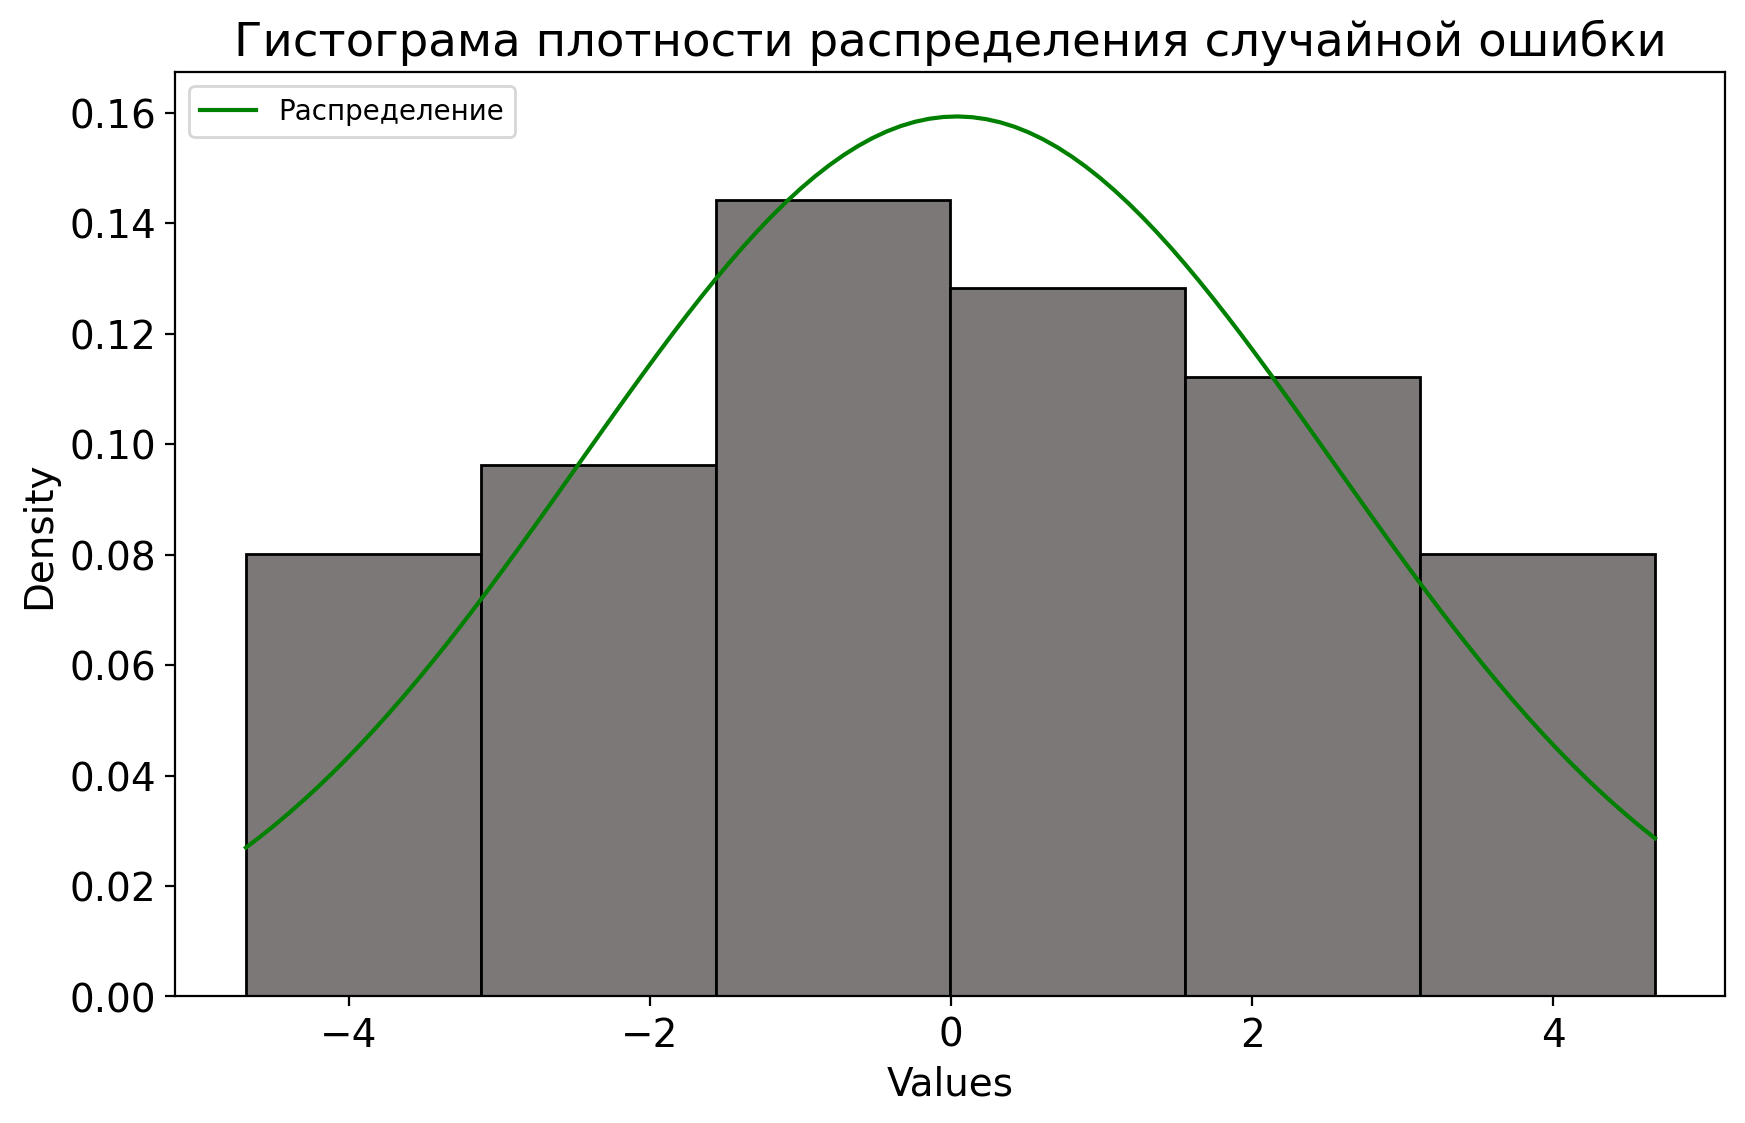

In [17]:
plot_hist(norm.y, norm.y_pred, norm.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n - \hat{m} - 1}$$

In [18]:
print(f"Случайная ошибка:")
print(norm.y - norm.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((norm.y - norm.y_pred)**2) / (norm.n - norm.m - 1)
print(estimate)

Случайная ошибка:
[-4.68397787 -4.31872063 -3.97258433 -3.64455333 -3.33361198 -3.03874463
 -2.75893563 -2.49316935 -2.24043013 -1.99970234 -1.76997031 -1.55021842
 -1.33943101 -1.13659243 -0.94068705 -0.75069921 -0.56561327 -0.38441358
 -0.20608451 -0.02961039  0.14602441  0.32183554  0.49883864  0.67804937
  0.86048336  1.04715627  1.23908373  1.4372814   1.64276491  1.85654993
  2.07965208  2.31308703  2.5578704   2.81501786  3.08554503  3.37046758
  3.67080115  3.98756138  4.32176391  4.6744244 ]

Оценка дисперсии случайной ошибки:
6.9659105943390625


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [19]:
p_value, chi2 = calculate_chi2(norm.x_k, norm.y, norm.y_pred, norm.n)
print(f"Статистика X^2: {chi2}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 5.326052966912901
P_value: 0.149420758923962
Не отклоняем гипотезу о нормальности распределения остатков.


#### <center>  Решим п. 1-7 для Равномерного распределения <center>

#### <center> Генерация данных <center>

In [20]:
theta = np.array([0.5, -1, -6, 2e-2])
var = 1.5
n = 40
m = 2
normal_distribution = False
uni = Distribution(theta, var, n, m, normal_distribution)

In [21]:
print("Шум")
print(uni.eps)

Шум
[-3.31422734 -2.11019628  3.44725045 -3.16178226  0.49666173  3.11410417
 -2.15583042 -0.71131243  1.44988384  3.45738159 -2.7711562   2.21693133
 -1.05834545  0.77518252 -3.44170114 -3.2410368   0.12870656 -0.6628165
  2.38651477 -3.07785129  1.7941401   1.77887879  1.51278801  0.56659544
  0.92063345  1.99775142  2.72463704  2.44774606  1.8806824   2.09047151
 -2.39431467 -0.32142365 -3.04643379 -0.64292228 -1.57080526  2.26880133
  2.84457115  2.43578415 -0.15938046  0.04704366]


In [22]:
print("Признак x")
print(uni.x_k)

Признак x
[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [23]:
print("Зависимая переменная y")
print(uni.y)

Зависимая переменная y
[-86.14 -77.26 -68.86 -60.94 -53.5  -46.54 -40.06 -34.06 -28.54 -23.5
 -18.94 -14.86 -11.26  -8.14  -5.5   -3.34  -1.66  -0.46   0.26   0.5
   0.26  -0.46  -1.66  -3.34  -5.5   -8.14 -11.26 -14.86 -18.94 -23.5
 -28.54 -34.06 -40.06 -46.54 -53.5  -60.94 -68.86 -77.26 -86.14 -95.5 ]


### <center> № 1 <center>

Найдем порядок  многочлена, используя критерий Стьюдента на уровне значимости 0.05. 
\
Поряд многочлена отпределяется коэффициентом при $ x_k^m $. 
\
Если $\theta_m = 0$, то порядок многочлена равен $m - 1$, иначе порядок многочлена $\ge m$
\
$H_0: \hat{\theta}_{\hat{m}} = 0$ 
\
$H_1: \hat{\theta}_{\hat{m}} \neq 0$
\
\
Для этого воспользуемся формулами:

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - \hat{m} - 1}$$

$$SE = \sqrt{diag(MSE*(X^TX)^{-1})}$$

$$t_i = \frac{\hat{\theta}_i}{SE},$$
где:
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка
\
$SE$- Стандартная ошибка
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_i$- Распределение Стьюдента с $n - \hat{m} - 1$ степенями свободы.


In [24]:
m = 2
while t_test(uni.x_k, uni.y, m, 0.05):
    m += 1

Степень многочлена = 2 является статистически значимым.
Степень многочлена = 3 не является статистически значимым.
Степень многочлена равна 2


In [25]:
for i in range(len(uni.w)):
    print(f'theta_{i} = {uni.w[i]}')

theta_0 = 0.9270411250014114
theta_1 = -0.8120932511911849
theta_2 = -6.041627653192009


Сравним с готовой реализацией в пакете STATSMODELS

In [26]:
X = np.vander(uni.x_k, 3, increasing=True)
distr_packet = sm.OLS(uni.phi + uni.eps, sm.add_constant(X))
distr_fitted = distr_packet.fit()
print(distr_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3481.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           7.57e-43
Time:                        23:00:16   Log-Likelihood:                -86.913
No. Observations:                  40   AIC:                             179.8
Df Residuals:                      37   BIC:                             184.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9270      0.524      1.769      0.0

### <center> № 2 <center>

Доверительный интервал для параметра $\theta_i$ с уровнем значимости $1 - \alpha$ будет иметь вид:
$$\hat{\theta_i} \pm t_{\alpha/2} * SE$$
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
$$SE = \sqrt{diag(MSE*(X^TX)^{-1})},$$ 
где:
\
$\theta_i$- Вес модели
\
$\hat{\theta}_i$ - Оценка весов модели
\
$t_{\alpha/2}$- Распределение Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$SE$- Стандартная ошибка
\
$\alpha$- Уровень значимости
\
$y_i$- Зависимая переменная для $i^{ого}$ объекта
\
$\hat{y}_i$- Предсказание модели для $i^{ого}$ объекта
\
$n$- Количество объектов
\
$\hat{m}$- Степень многочлена
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка.

In [27]:
for a in [0.95, 0.99]:
    print(f"Уровень доверия {a}:")
    for i, w in enumerate(uni.w):
        l, r = calculate_confidence_interval_w(uni.se[i], w, uni.n, uni.m, a)
        print(f"\tTheta_{i}={w}:")
        print(f"\t\tДоверительный интервал {l, r}")
    print()

Уровень доверия 0.95:
	Theta_0=0.9270411250014114:
		Доверительный интервал (-0.02642053272396583, 1.8805027827267886)
	Theta_1=-0.8120932511911849:
		Доверительный интервал (-1.08873961625888, -0.5354468861234898)
	Theta_2=-6.041627653192009:
		Доверительный интервал (-6.175100471850229, -5.908154834533789)

Уровень доверия 0.99:
	Theta_0=0.9270411250014114:
		Доверительный интервал (-0.35074375885923814, 2.204826008862061)
	Theta_1=-0.8120932511911849:
		Доверительный интервал (-1.1828418183667215, -0.44134468401564825)
	Theta_2=-6.041627653192009:
		Доверительный интервал (-6.220501705133036, -5.862753601250982)



### <center> № 3 <center>

Доверительный интервал для полезного сигнала $f(x, w)$ с уровнем значимости $1 - \alpha$ будет иметь вид:

$$\hat{f}(x, w) \pm t_{\alpha / 2}\sqrt{MSE * x(X^T X)^{-1} x^T},$$
где:
\
$f(x, w)$- полезный сигнал
\
$x$- аргумент полезного сигнала
\
$w$- веса полезного сигнала
\
$t_{\alpha/2}$- Распределение Стьюдента с $(n - \hat{m} - 1)$ степенями свободы
\
$MSE$ - Среднеквадратичное отклонение, оценка дисперсии ошибок
\
$X$- Обучающая выборка.

In [28]:
limits = {}

In [29]:
for alpha in [0.95, 0.99]:
    print(f"Уровень доверия {alpha}:")
    l, r = calculate_confidence_interval_phi(uni.mse, uni.X, uni.w, uni.n, uni.m, alpha)
    limits[alpha] = [l[0], r[0]]
    print("\tДоверительный интервал:")
    print('\t(')
    print(f"\t{l[0]}")
    print(f"\t{r[0]}")
    print('\t)')
    print()

Уровень доверия 0.95:
	Доверительный интервал:
	(
	-6.04162765319201*x**2 - 0.812093251191185*x - 4.02056642616735*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.927041125001411
	-6.04162765319201*x**2 - 0.812093251191185*x + 4.02056642616735*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.000703564727954972) + 0.000703564727954972*x + 0.0562382739212008) + 0.927041125001411
	)

Уровень доверия 0.99:
	Доверительный интервал:
	(
	-6.04162765319201*x**2 - 0.812093251191185*x - 5.38817577223854*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023487*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023487*x**2 + 0.00473451452270451*x + 0.00070356472795

### <center> № 4 <center>

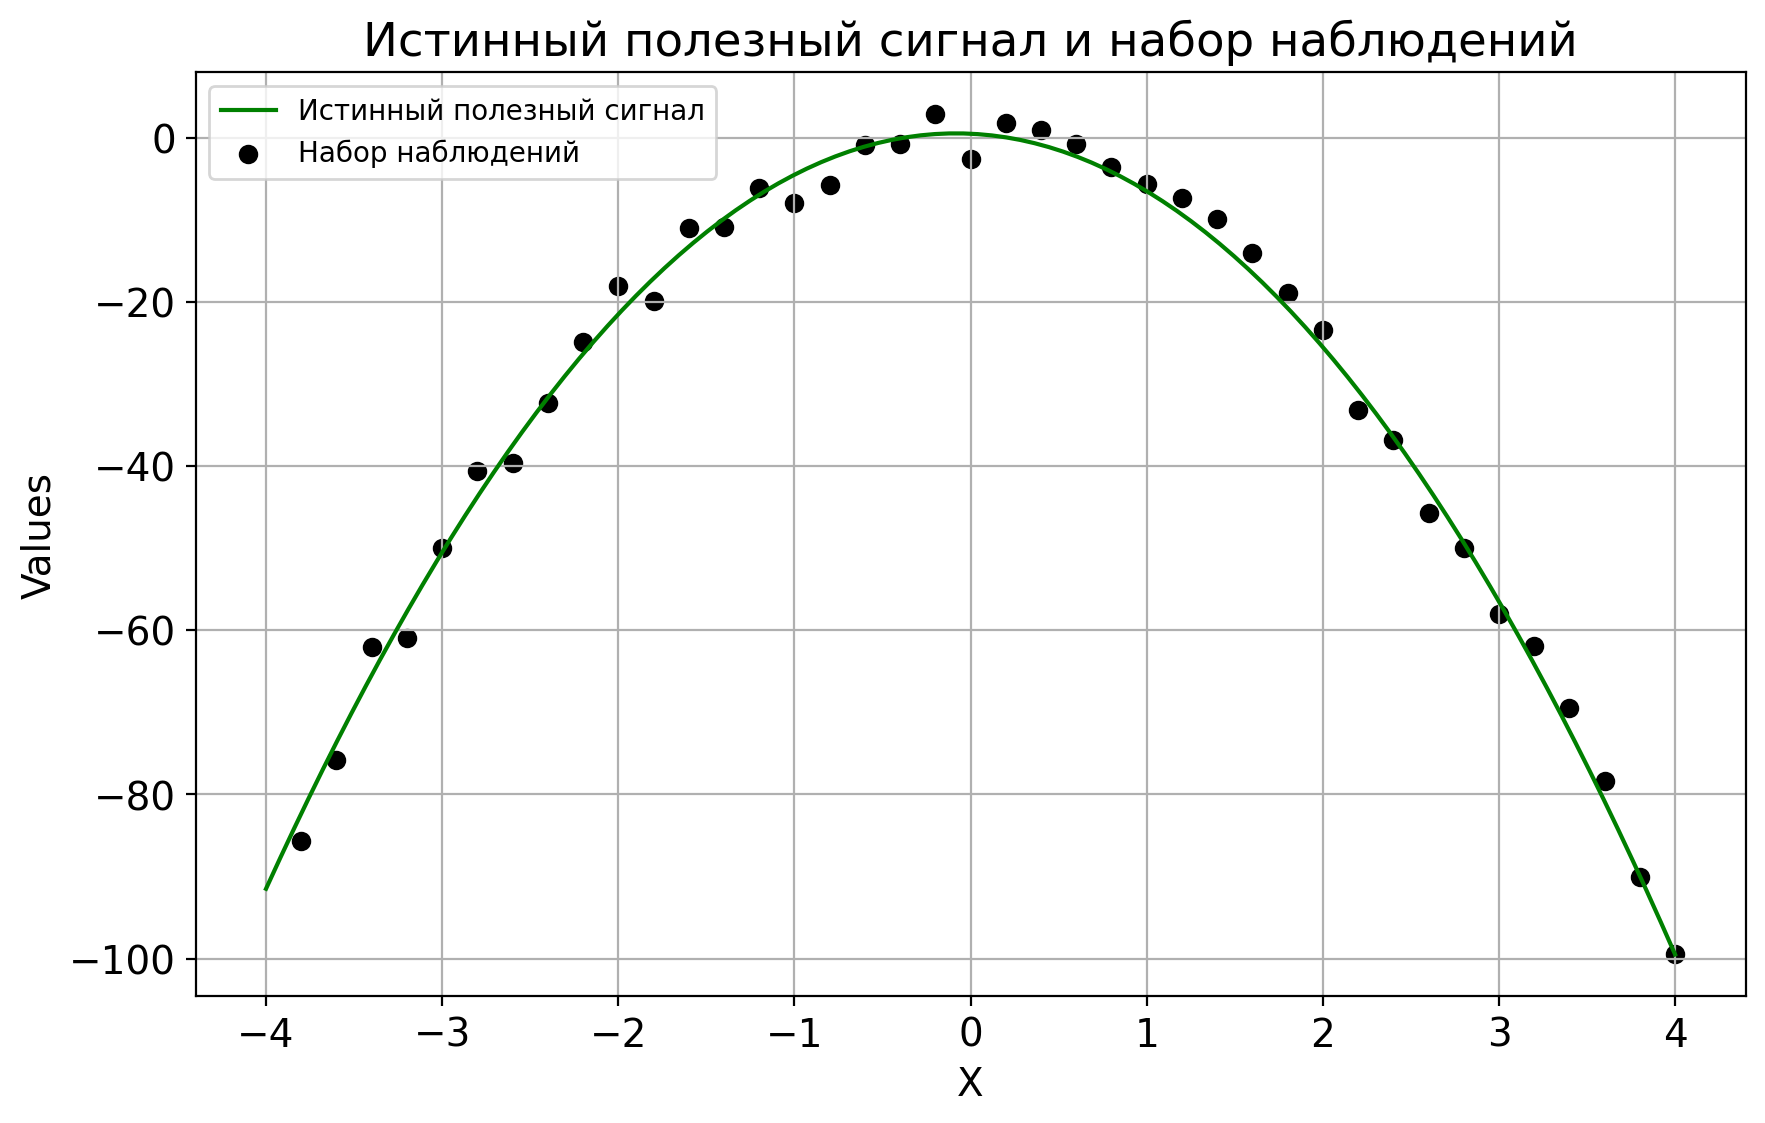

In [30]:
plot_phi(uni.x_k, uni.theta, uni.eps, uni.m)

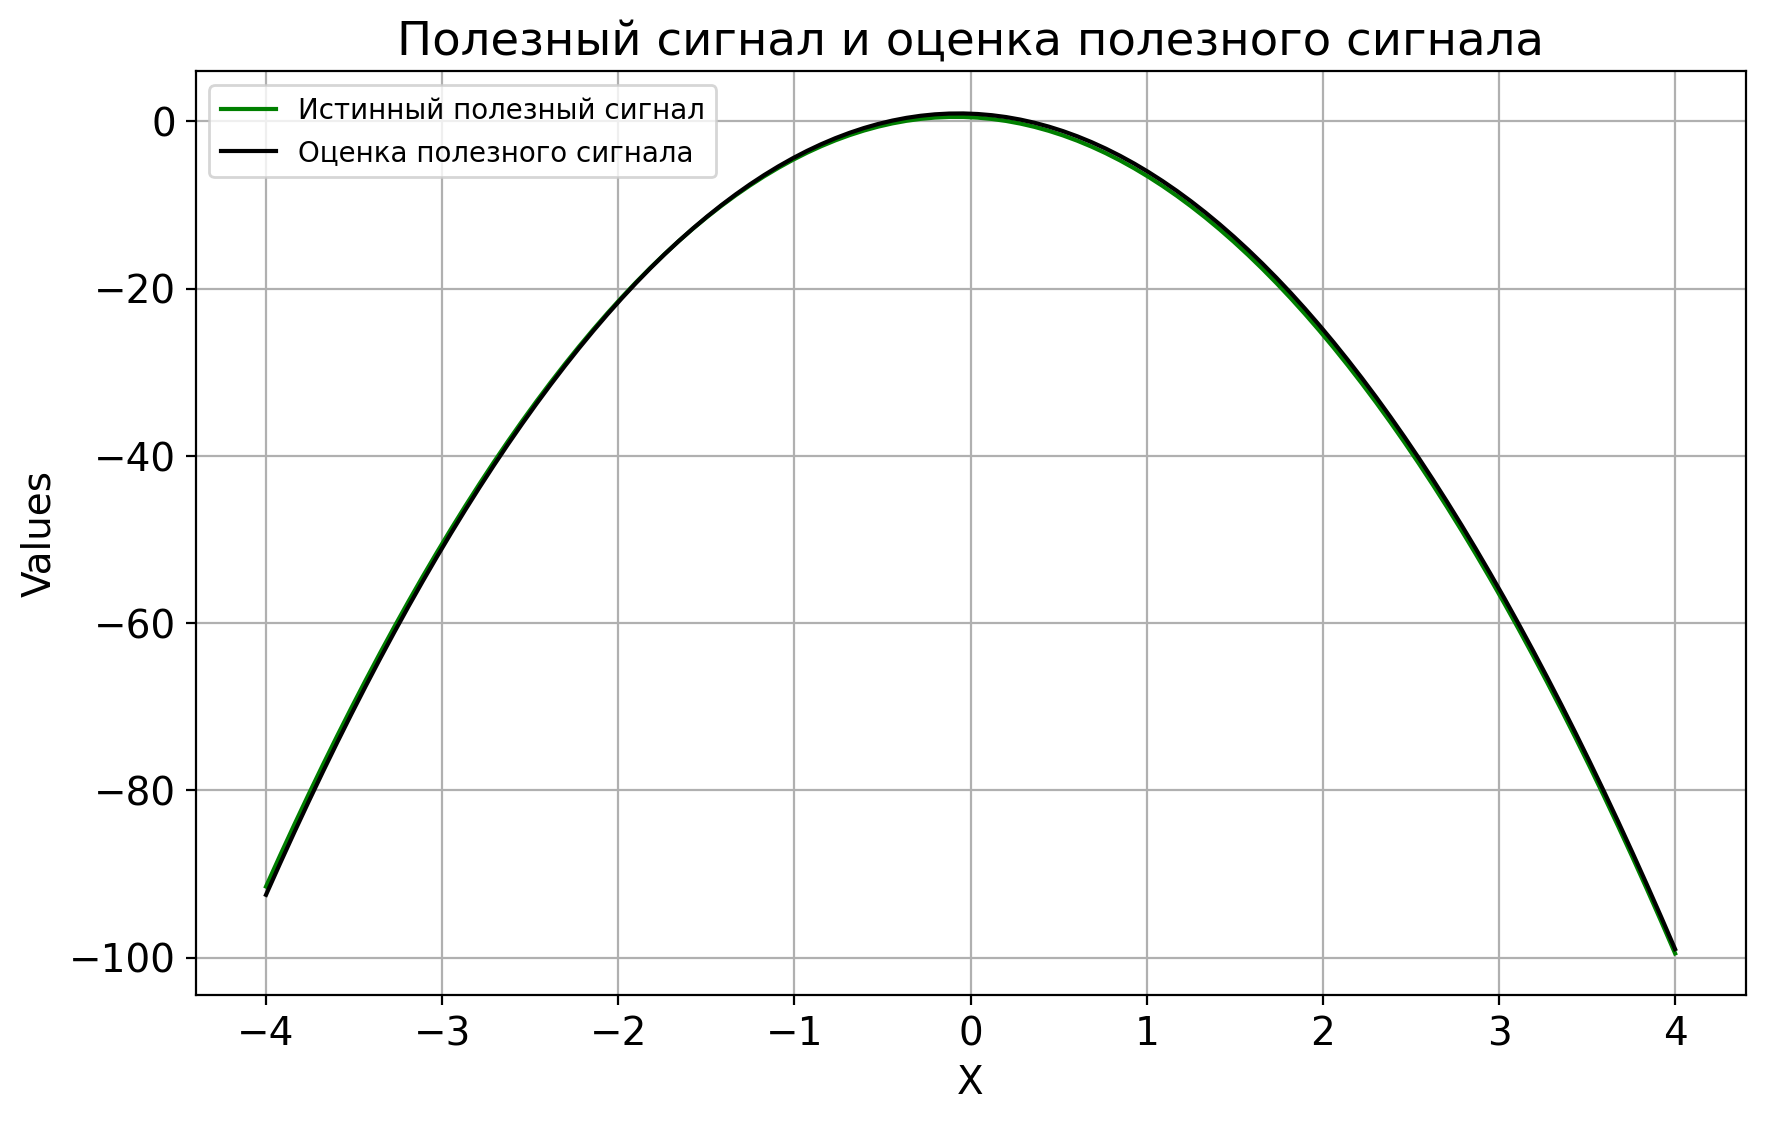

In [31]:
plot_phi_estimation(uni.theta, uni.w, uni.m)

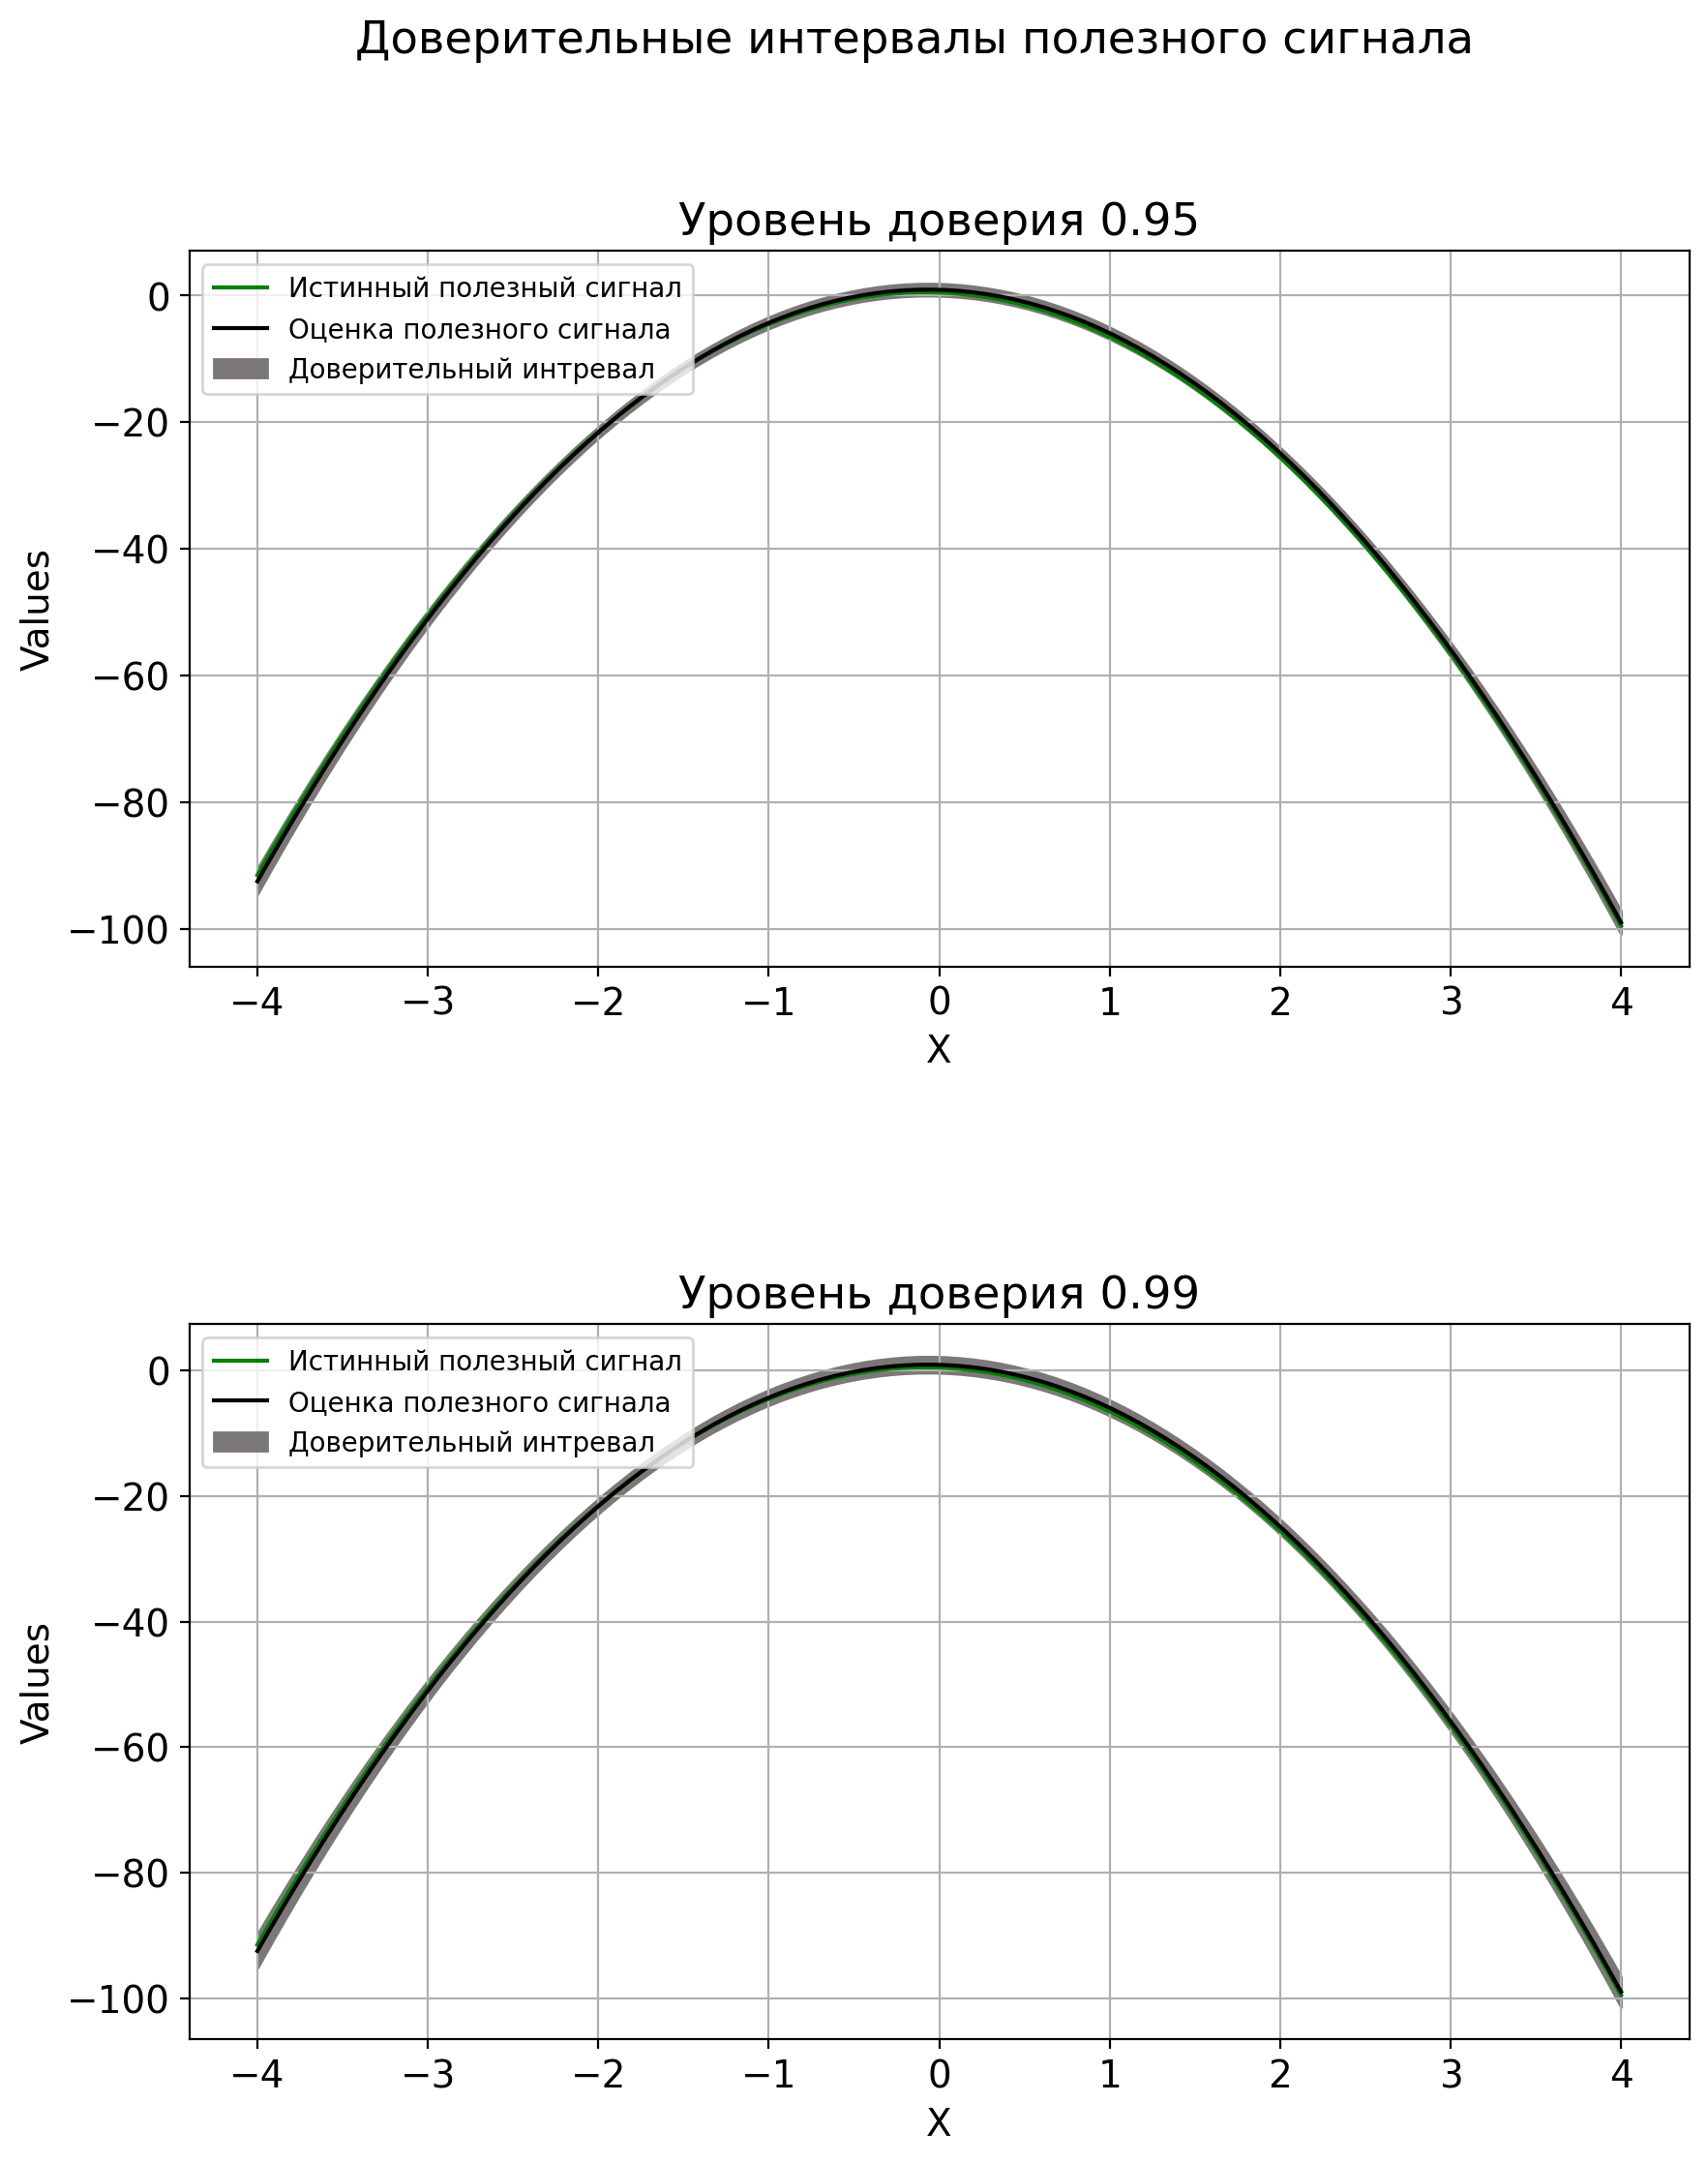

In [32]:
plot_phi_intervals(uni.theta, uni.w, uni.m, limits)

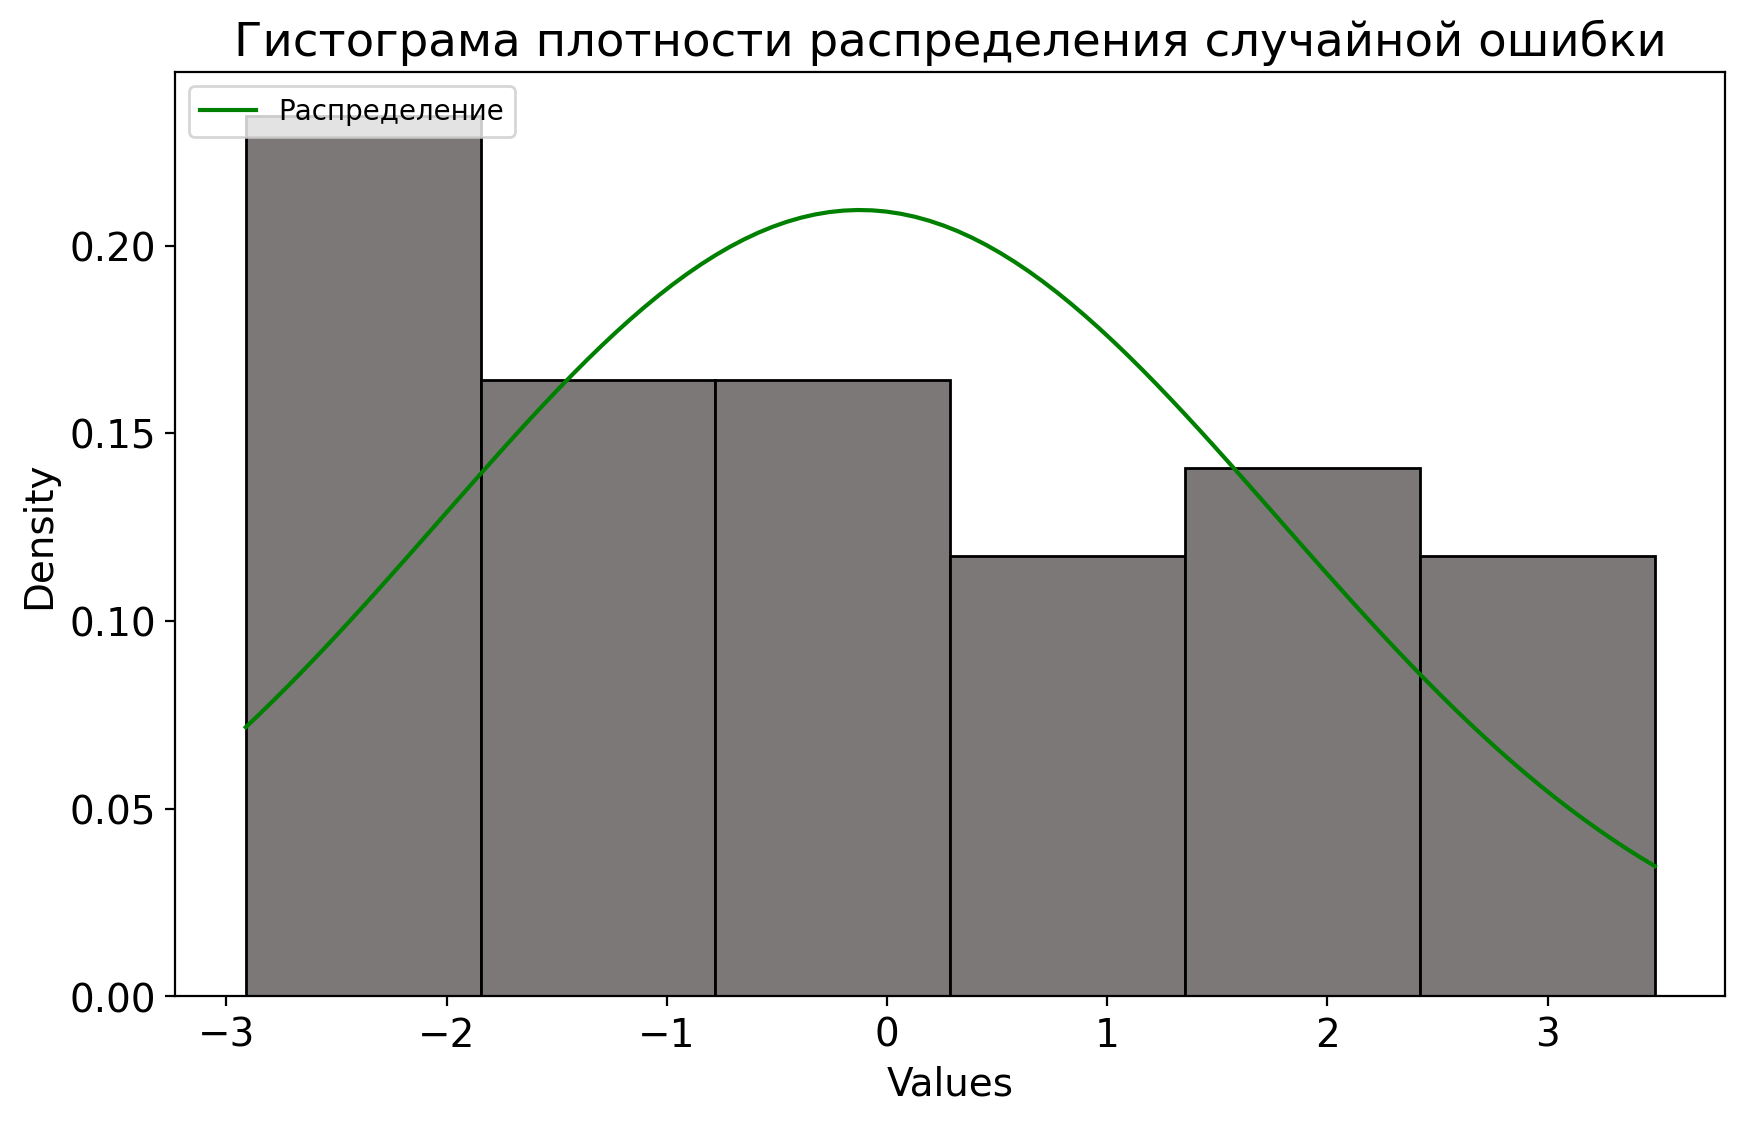

In [33]:
plot_hist(uni.y, uni.y_pred, uni.n)

### <center> № 6 <center>

Вычислим оценку максимального правдоподобия дисперсии $\sigma^2$ при условии нормальности случайной ошибки:

$$\varepsilon\sim N(\mu, \sigma^2)$$
$$l(\sigma^2|y) = P(y|\sigma^2)$$
$$l(\sigma^2|y) = \prod_{i=1}^{n} p(y_i|\sigma^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi}\sigma}\exp(-\frac{1}{2 \sigma^2}(y_i - x_i^T \hat{\theta})^2)$$
$$log l(\sigma^2|y) = -\frac{n}{2}ln(2\pi) - \frac{n}{2}ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2$$
$$\frac{\partial log l(\sigma^2|y)}{\partial\sigma^2} = -\frac{n}{2} \frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2 = 0$$
$$\hat{\sigma}^2 = \frac{\sum_{i=1}^{n}(y_i - x_i^T\hat{\theta})^2}{n - \hat{m} - 1}$$

In [34]:
print(f"Случайная ошибка:")
print(uni.y - uni.y_pred)
print()
print(f"Оценка дисперсии случайной ошибки:")
estimate = np.sum((uni.y - uni.y_pred)**2) / (uni.n - uni.m - 1)
print(estimate)

Случайная ошибка:
[-2.91189217 -2.81108244 -2.70694251 -2.59947236 -2.488672   -2.37454143
 -2.25708064 -2.13628965 -2.01216844 -1.88471701 -1.75393538 -1.61982353
 -1.48238148 -1.34160921 -1.19750672 -1.05007403 -0.89931112 -0.745218
 -0.58779467 -0.42704113 -0.26295737 -0.0955434   0.07520078  0.24927517
  0.42667978  0.6074146   0.79147963  0.97887487  1.16960032  1.36365599
  1.56104187  1.76175796  1.96580426  2.17318078  2.38388751  2.59792445
  2.8152916   3.03598896  3.26001654  3.48737433]

Оценка дисперсии случайной ошибки:
3.937432234531438


### <center> № 7 <center>
Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона
\
Расчитаем нужную нам статистику по формуле:
$$n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = P(t_{k+1}) - P(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

In [35]:
p_value, chi2 = calculate_chi2(uni.x_k, uni.y, uni.y_pred, uni.n)
print(f"Статистика X^2: {chi2}")
print(f"P_value: {p_value}")
if p_value < 0.05:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика X^2: 15.058553962117296
P_value: 0.0017672881034488386
Отклоняем гипотезу о нормальности распределения остатков.


#### module distribution
```py 
import numpy as np

class Distribution:
    '''
    Класс Распределения 
    inputs:
        - theta: np.array[float] массив размерностью (m + 1)- веса модели 
        - var: float- Стандартное отклонение 
        - n: int- Размер выборки (количество объектов)
        - m: int- Сложность модели (степень многочлена)
        - normal_distribution: bool- Вид распределения (True - Normal, False - Uniform)
    '''
    def __init__(self, theta: np.array, var: float, n: int, m: int, normal_distribution: bool) -> None:
        self.theta = theta[:m+1]
        self.var = var
        self.n = n
        self.m = m
        self.normal_distribution = normal_distribution
        self.eps = self.gen_distribution()
        self.x_k = self.calculate_x_k()
        self.X = self.calculate_X()
        self.phi = self.calculate_phi()
        self.y = self.calculate_y()

        self.w = self.fit()
        self.y_pred = self.predict()
        self.mse = self.calculate_mse()
        self.se = self.calculate_se()


    def gen_distribution(self) -> np.array:
        '''
        Функция для генерации распределения шума
        returns: np.array[float] массив с размерностью (n)- неустранимый шум
        '''
        if self.normal_distribution:
            eps: np.array = np.random.normal(0, self.var, self.n)
        else:
            eps: np.array = np.random.uniform(-3 * np.sqrt(self.var), 3 * np.sqrt(self.var), self.n)
        return eps

    def calculate_x_k(self) -> np.array:
        '''
        Функция для рассчета столбца признака
        returns: np.array[float] массив с размерностью (n)- признак
        '''
        return np.array([-4 + (k + 1) * 8 / self.n for k in range(self.n)])

    def calculate_X(self) -> np.array:
        '''
        Функция для рассчета матрицы объект-признак
        returns: np.array[np.array[float]] массив с размерностью (n, m + 1)- матрица объект-признак
        '''    
        return np.vander(self.x_k, self.m + 1, increasing=True)

    def calculate_phi(self) -> np.array:
        '''
        Функция для рассчета полезного сигнала
        returns: np.array[float] массив с размерностью (n)- полезный сигнал
        '''
        return np.dot(self.X, self.theta)

    def calculate_y(self) -> np.array:
        '''
        Функция для рассчета зависимой переменной y
        returns: np.array[float] массив с размерностью (n)- зависимая переменная
        '''
        return self.x_k + self.phi

    def fit(self) -> np.array:
        '''
        Функция тренировки модели
        returns: np.array[float] массив с размерностью (n)- веса модели
        '''
        y = self.phi + self.eps
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.X.T, self.X)), self.X.T), y)
        return self.w

    def predict(self) -> np.array:
        '''
        Функция предсказания зависимой переменной
        returns: np.array[float] массив с размерностью (n)- зависимая переменная
        '''
        return np.dot(self.X, self.w) 

    def calculate_mse(self) -> float:
        '''
        Функция для рассчета Среднеквадратичного отклонения
        returns: float число- Среднеквадратичное отклонение
        '''
        return (((self.y - self.y_pred))**2 / (self.n - self.m - 1)).sum()

    def calculate_se(self) -> float:
        '''
        Функция для рассчета Среднеквадратичного отклонения
        returns: float число- Среднеквадратичное отклонение
        '''
        return np.sqrt(np.diag(self.calculate_mse() * np.linalg.inv(np.dot(self.X.T, self.X))))
```
#### module statistic
```py
import numpy as np
import sympy as sp

from scipy.stats import t, norm, chi2


def t_test(x:np.array, y: np.array, n: int, alpha: float) -> bool:
    '''
    Функция для рассчета степени многочлена полезного сигнала
    inputs:
        - x: np.array[float]: массив с размерностью (m + 1)- веса модели
        - se: float- Стандартная ошибка
        - n: int- Размер выборки (количество объектов)
        - m: int- Сложность модели (степень многочлена)
        - alpha: float- Уровень значимости
    returns: bool- Является ли m степенью многочлена.
    '''
    X: np.array = np.vander(x, n + 1, increasing=True) 
    num_samples, num_features = X.shape
    w: np.array = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    mse: float = ((y - np.dot(X, w))**2 / (num_samples - num_features)).sum()
    se: np.array = np.sqrt(np.diag(mse * np.linalg.inv(np.dot(X.T, X))))
    t_: np.array = np.abs(w / se)
    df: int = num_samples - num_features
    p_value = 2 * (1 - t.cdf(t_, df=df))
    if p_value[n] < alpha:
        print(f'Степень многочлена = {n} является статистически значимым.')
        return True
    print(f'Степень многочлена = {n} не является статистически значимым.\nСтепень многочлена равна {n - 1}')
    return False

def calculate_confidence_interval_w(se: float, w: float, n: int, m: int, alpha: float) -> tuple:
    '''
    Функция для рассчета доверительных интервалов весов
    inputs:
        - se: float- Стандартная ошибка
        - w: np.array[float] массив с размерность (m + 1)- Веса модели
        - n: int- Размер выборки (количество объектов)
        - m: int- Сложность модели (степень многочлена)
        - alpha: float- Уровень значимости
    returns: tuple массив с размерностью(2)- Доверительный интервал
    '''
    t_ = t.ppf(1 - (1 - alpha) / 2, df=n - m - 1)
    return (w + i * se * t_ for i in [-1, 1])

def calculate_confidence_interval_phi(mse: float, X: np.array, w: np.array, n: int, m: int, alpha: float) -> tuple:
    '''
    Функция для рассчета доверительных интервалов полезного сигнала
    inputs:
        - mse: float- Среднеквадратичная ошибка
        - X: np.array[np.array[float]] массив с размерностью(n, m + 1)- Матрица объект-признак
        - w: np.array[float] массив с размерность (m + 1)- Веса модели
        - n: int- Размер выборки (количество объектов)
        - m: int- Сложность модели (степень многочлена)
        - alpha: float- Уровень значимости
    returns: tuple массив с размерностью(2)- Доверительный интервал
    '''
    symb_x = sp.symbols("x")
    x = sp.Matrix(np.vander(np.array([symb_x]), m + 1, increasing=True))
    t_ = t.ppf(1 - (1 - alpha) / 2, df=n - m - 1)
    root = sp.sqrt(mse * (x * np.linalg.inv(np.dot(X.T, X)) * x.T))
    f_pred = x * sp.Matrix(w)
    return (f_pred + i *  root * t_ for i in [-1, 1])

def calculate_chi2(x, y, y_pred, n) -> tuple:
    diff = y - y_pred
    num_bins = int(3.32 * np.log10(n)) + 1
    hist, bin_edges = np.histogram(diff, bins=num_bins, density=True)
    bin_width = bin_edges[1] - bin_edges[0]
    expected_freq = np.diff([0] + list(norm.cdf(bin_edges, loc=np.mean(diff), scale=np.std(diff))) + [1])
    estimated_freq = [0] + list(hist * bin_width) + [0]
    chi2_ = len(x)*np.sum((estimated_freq - expected_freq)**2 / expected_freq)
    p_value = 1 - np.sum(chi2.cdf(chi2_, df=len(hist) - 3))
    return p_value, chi2_
```

#### module graphics
```py
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from scipy.stats import norm, uniform


def plot_phi(x_k, theta, eps, m) -> None:
    '''
    inputs:
        - x_k: np.array[flota] массив размерностью (n)- признаки модели
        - theta: np.array[float] массив размерностью (m + 1)- веса модели 
        - eps: np.array[float] массив с размерностью (n)- шум модели
        - m: int- Сложность модели (степень многочлена)  
    '''
    x = np.linspace(-4, 4, 100)
    X = np.vander(x, m + 1, increasing=True)
    X_k = np.vander(x_k, m + 1, increasing=True)
    plt.figure()
    plt.title('Истинный полезный сигнал и набор наблюдений')
    plt.plot(x, np.dot(X, theta), color='green', label='Истинный полезный сигнал')
    plt.scatter(x_k, np.dot(X_k, theta) + eps, color='black', label='Набор наблюдений')
    plt.legend(loc="upper left", fontsize=10)
    plt.xlabel('X')
    plt.ylabel('Values')
    plt.grid()
    plt.show()

def plot_phi_estimation(theta, w, m) -> None:
    '''
    inputs:
        - theta: np.array[float] массив размерностью (m + 1)- истинные веса модели 
        - w: np.array[float] массив с размерностью (m + 1)- найденные веса модели
        - m: int- Сложность модели (степень многочлена)  
    '''
    x = np.linspace(-4, 4, 100)
    X = np.vander(x, m + 1, increasing=True)
    plt.figure()
    plt.title('Полезный сигнал и оценка полезного сигнала')
    plt.plot(x, np.dot(X, theta), color='green', label='Истинный полезный сигнал')
    plt.plot(x, np.dot(X, w), color='black', label='Оценка полезного сигнала')
    plt.legend(loc="upper left", fontsize=10)
    plt.xlabel('X')
    plt.ylabel('Values')
    plt.grid()
    plt.show()

def plot_phi_intervals(theta, w, m, limits) -> None:
    '''
    inputs:
        - theta: np.array[float] массив размерностью (m + 1)- истинные веса модели 
        - w: np.array[float] массив с размерностью (m + 1)- найденные веса модели
        - m: int- Сложность модели (степень многочлена) 
        - limits: dict- значения доверительных интревалов уровней доверия 95 и 99 
    '''
    x = np.linspace(-4, 4, 100)
    X = np.vander(x, m + 1, increasing=True)
    symb_x = sp.symbols('x')
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))
    for i, alpha in enumerate(limits.keys()):
        l, r = limits[alpha]
        l, r = sp.lambdify(symb_x, l), sp.lambdify(symb_x, r)
        
        ax[i].set_title(f'Уровень доверия {alpha}')
        ax[i].plot(x, np.dot(X, theta), color='green', label='Истинный полезный сигнал')
        ax[i].plot(x, np.dot(X, w), color='black', label='Оценка полезного сигнала')
        ax[i].fill_between(x, l(x), r(x), color='#7d7878', label='Доверительный интревал')
        ax[i].legend(loc="upper left", fontsize=10)
        ax[i].set_xlabel('X')
        ax[i].set_ylabel('Values')
        ax[i].grid()
        
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Доверительные интервалы полезного сигнала')


def plot_hist(y, y_pred, n) -> None:
    '''
    inputs:
        - y: np.array[float] массив размерностью (n)- истинные зависимые переменные(target) 
        - y_pred: np.array[float] массив размерностью (n)- найденные зависимые переменные(prediction) 
        - n: int- Размер выборки (количество объектов)
    '''
    diff = y - y_pred
    num_cols: int = int(3.322 * np.log10(n)) + 1
    _, bins = np.histogram(y - y_pred, bins=num_cols, density=True)
    values: np.array = np.linspace(bins[0], bins[-1], 100)
    distribution = norm.pdf(values, np.mean(diff), np.std(diff))
    plt.figure()
    plt.title('Гистограма плотности распределения случайной ошибки')
    plt.hist(y - y_pred, bins=num_cols, density=True, color='#7d7878', edgecolor='black')
    plt.plot(values, distribution, color='green', label='Распределение')
    plt.legend(loc="upper left", fontsize=10)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()
```

### <center> Литература <center>

[Matburo.ru](https://www.matburo.ru/tv_book.php): Для поиска информации.
\
\
[Statlect.com](https://www.statlect.com/): Для поиска информации.
\
\
[Huggingface.co](https://huggingface.co/chat/): Для поиска информации и разметки Markdown полей.
\
\
[Openai.com](https://chat.openai.com): Для поиска информации и разметки Markdown полей.
